In [1]:
import os
import tensorflow as tf
from keras import optimizers

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.chdir("/tf/notebooks/src")

2023-05-15 18:30:55.005856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from models import SiameseModel
from utils import load_data, visualise

In [3]:
print("Tensorflow version:", tf.__version__)
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))

Tensorflow version: 2.12.0
Num GPUs Available:  1


2023-05-15 16:31:55.318679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 16:31:55.485283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 16:31:55.485474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 6194 files belonging to 1 classes.


2023-05-15 16:31:55.656575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Found 6194 files belonging to 1 classes.


2023-05-15 16:31:55.656747: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 16:31:55.656864: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 16:31:56.453219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 6194 files belonging to 1 classes.


2023-05-15 16:31:56.985834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6194]
	 [[{{node Placeholder/_0}}]]
2023-05-15 16:31:56.986125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype string and shape [6194]
	 [[{{node Placeholder/_18}}]]
2023-05-15 16:32:07.009947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 44 of 64
2023-05-15 16:32:11.035783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


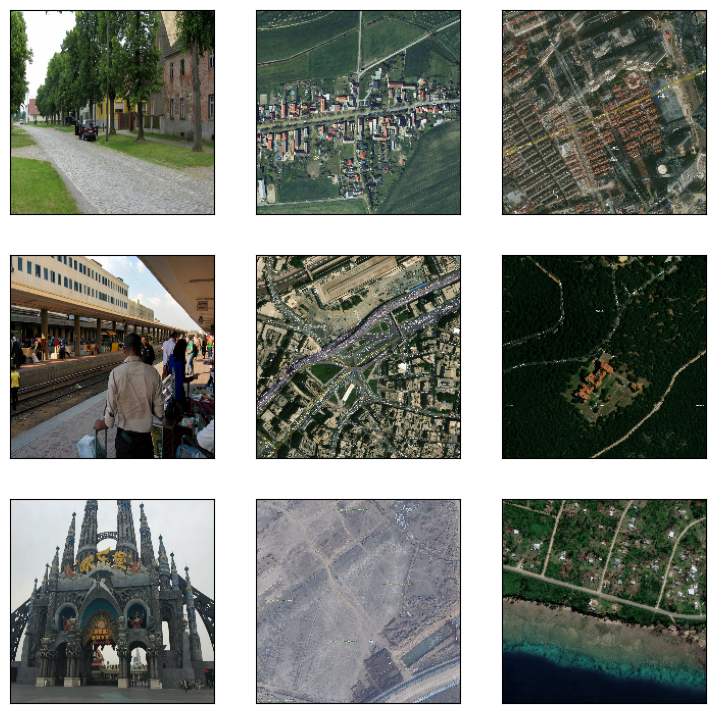

In [4]:
BATCH_SIZE = 16
train_data = load_data(anchor_images_path="/tf/CVUSA/terrestrial",
                       positive_images_path="/tf/CVUSA/satellite",
                       batch_size=BATCH_SIZE)
visualise(*list(train_data.take(1).as_numpy_iterator())[0])

In [ ]:
# Checkpoint during training
model = SiameseModel()
model.compile(optimizer=optimizers.Adam(0.001),
              weighted_metrics=[])

In [ ]:
model.fit(train_data,
          epochs=1)

In [10]:
tf.saved_model.save(model.siamese_network, "/tf/notebooks/resnet")

INFO:tensorflow:Assets written to: /tf/notebooks/resnet/assets


INFO:tensorflow:Assets written to: /tf/notebooks/resnet/assets


In [13]:
model.siamese_network.save("/tf/notebooks/resnet_2")

INFO:tensorflow:Assets written to: /tf/notebooks/resnet_2/assets


INFO:tensorflow:Assets written to: /tf/notebooks/resnet_2/assets


In [5]:
cvmNet = tf.keras.models.load_model("/tf/notebooks/src/trained_models/CVM-Net_model/CVM-NET-I/CVM-Net-I_model")

OSError: SavedModel file does not exist at: /tf/notebooks/src/trained_models/CVM-Net_model/CVM-NET-I/CVM-Net-I_model/{saved_model.pbtxt|saved_model.pb}

IndexError: arrays used as indices must be of integer (or boolean) type